In [47]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#Data Navigation/exploration


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [50]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [51]:
#df.quality.unique()- avoid because sometimes there are column names with spaces

df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<AxesSubplot:ylabel='quality'>

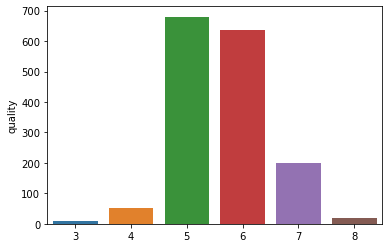

In [52]:
#df["quality"].value_counts().plot(kind="bar")

sns.barplot(x=df["quality"].value_counts().index, y=df["quality"].value_counts())

<AxesSubplot:>

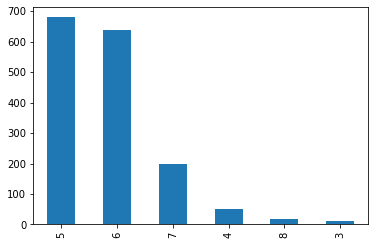

In [53]:
df["quality"].value_counts().plot(kind="bar")

H:\ananconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

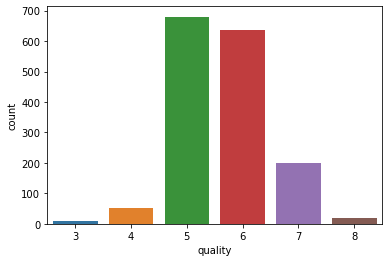

In [54]:
sns.countplot(df["quality"])

In [55]:
#
bins=(2,6,8)
bins_name=["bad","good"]
df["quality"]=pd.cut(df["quality"], bins=bins, labels=bins_name)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [56]:
df.quality.unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [57]:
#bins=(2,6,8)
#bins_name=["bad","good"]
#df["bins"]=pd.cut(df['quality'], bins=bins, labels=bins_name)
#df

In [58]:
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder

#initialize labelEncoder
label_quality=LabelEncoder()

df["quality"]=label_quality.fit_transform(df["quality"])
df.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [59]:
df.quality.value_counts()

0    1379
1     217
Name: quality, dtype: int64

H:\ananconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

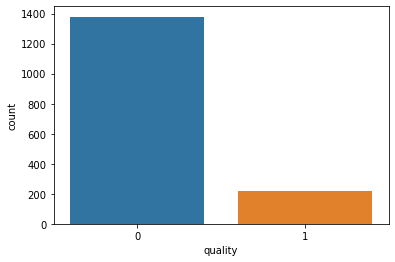

In [60]:
#df['bins'].value_counts().plot(kind="bar")
sns.countplot(df['quality'])

In [61]:
#df.drop("quality", axis=1, inplace=True)


In [62]:
X=df.drop(["quality"], axis=1)
Y=df["quality"]
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int32

In [63]:
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [64]:
from sklearn import model_selection 

from sklearn.model_selection import train_test_split


In [65]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=42)
#X_train, X_test,Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=42)#default is 20%, random_state makes similar results

X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((1117, 11), (479, 11), (1117,), (479,))

In [66]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train[:10]

array([[ 4.58243012e-01, -5.26136041e-02,  2.98985152e-01,
        -9.03469345e-01, -3.70103148e-01, -6.77129419e-01,
        -5.10534532e-01,  5.75612509e-01, -4.69620532e-01,
        -3.48075246e-01, -1.05146923e+00],
       [-5.19242559e-01,  6.14904379e-01, -1.04038347e+00,
        -5.35466114e-01,  2.43348724e-01, -7.74516087e-01,
        -7.20738029e-01, -3.33677793e-01, -8.00912244e-02,
        -4.72292514e-01, -7.68724272e-01],
       [-2.89245954e-01,  2.81145387e-01, -7.31298405e-01,
        -3.14664176e-01,  2.84245515e-01,  1.01963929e-01,
        -3.30360106e-01, -1.24296810e+00, -4.69620532e-01,
        -7.82835685e-01,  7.39248820e-01],
       [ 7.45738768e-01,  1.69892390e-01,  1.95956797e-01,
         2.00540346e-01,  1.84163707e-02, -9.28094079e-02,
        -3.00693965e-02,  6.29100174e-01, -1.31360070e+00,
         1.63940105e+00, -3.91730999e-01],
       [-5.92493492e-02, -1.66578206e+00,  7.62612753e-01,
        -4.61865468e-01, -3.90551544e-01, -6.77129419e-01,
  

**Extra cells to try oversampling**

In [67]:
from collections import Counter

print(Counter(Y_train))

Counter({0: 960, 1: 157})


In [68]:
from imblearn.over_sampling import SMOTE

oversampling=SMOTE()

X_train_a, Y_train_a=oversampling.fit_resample(X_train, Y_train)

Y_train_a.value_counts()

0    960
1    960
Name: quality, dtype: int64

In [69]:
oversampling=SMOTE()

X_test_a, Y_test_a=oversampling.fit_resample(X_test, Y_test)

Y_test_a.value_counts()

0    419
1    419
Name: quality, dtype: int64

In [70]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=200)

rfc.fit(X_train_a,Y_train_a)

pred_rfc=rfc.predict(X_test)

pred_rfc



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [71]:
rfc.score(X_train_a,Y_train_a)

1.0

In [72]:
rfc.score(X_test,Y_test)

0.8872651356993737

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       419
           1       0.54      0.70      0.61        60

    accuracy                           0.89       479
   macro avg       0.75      0.81      0.77       479
weighted avg       0.90      0.89      0.89       479



In [74]:
print(confusion_matrix(Y_test, pred_rfc))

[[383  36]
 [ 18  42]]


In [75]:
from sklearn.metrics import accuracy_score


accuracy=accuracy_score(Y_test, pred_rfc)
accuracy

0.8872651356993737

**For a random Sample**

In [76]:



Xnew=[[8,0.9,0.01,1.2,0.076,20,40,0.1,4,0.6,10]]

Xnew=sc.transform(Xnew)

ynew=rfc.predict(Xnew)

ynew

H:\ananconda1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [77]:
import pickle

In [78]:
with open("model_pickle", "wb") as file: #"wb"-write binary
    pickle.dump(rfc, file)